# CPT example: planning dual-Doppler campaign
### Nikola Vasiljevic, August 24th 2019

In this example we will use [CPT](https://www.wind-energ-sci-discuss.net/wes-2019-13/) to plan a fictive measurement campaign for a site consisting of 12x80m turbines.
<br>The site is located at the sea coast of Croatia in vicinity of the town of Šibenik.

It is assumed that you have CPT installed if not use following link for details on the CPT installation:
<br>https://github.com/niva83/campaign-planning-tool
<br>The first thing we need to do is to import CPT and numpy libraries by executing following lines of code:

In [1]:
from campaign_planning_tool import CPT
import numpy as np

If everything when well you have access to a number of methods (i.e., functions) and attributes (i.e., data) of CPT class. At any time you want to have an overview of the CPT class you can execute command:

```
help(CPT)
```

Don't get overwhelmed with a long list of methods and attributes, nevertheless lidar experts will notice some familiar terms. We will slowely go through the process of using important methods in the campaign planning process, while some of the data (attributes set as constants) we will modify for the purpose of demonstrating how CPT library is quite adaptable for your use-case.

In [2]:
#help(CPT)

In [33]:
help(CPT.set_utm_zone)

Help on function set_utm_zone in module campaign_planning_tool._generate_layers:

set_utm_zone(self, utm_zone)
    Sets EPSG code, latitudinal and longitudinal zones to the CPT instance. 
    
    Parameters
    ----------
    utm_zone : str
        A string representing an UTM grid zone, containing digits (1 to 60) 
        indicating the longitudinal zone followed by a character (from 'C' 
        to 'X' excluding 'O') corresponding to the latitudinal zone.



Let us start by creating a CPT object:

In [3]:
layout = CPT()

Before we proceed adding the measurement points it important to know that the CPT methods perform calculation in UTM coordinate system (i.e., positions provided as triplets Easting, Northing and Height). Therefore it is required to set a proper UTM zone to the class, which in our case is 33T. The digits in the UTM zone represent so-called latitudinal zone, while a character represent longitudinal zone. Both, digits and character are required to be provided to the CPT class:

In [4]:
layout.set_utm_zone('33T')

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set


Now that we have set a proper UTM zone we can add our measurement point to the CPT class.
<br>Let's consider the case where you only have Easting, Northing and turbine hub height:

In [5]:
points = np.array([
[576697.34, 4845753, 80],
[576968, 4845595, 80],
[577215, 4845425, 80],
[577439, 4845219, 80],
[577752, 4845005, 80],
[577979, 4844819, 80],
[578400, 4844449, 80],
[578658, 4844287, 80],
[578838, 4844034, 80],
[578974, 4843842, 80],
[579121, 4844186, 80],
[579246, 4843915, 80]
])

However, the CPT methods work with the height provided as the height above sea level. 
<br>Therefore, we would need to add terrain height to the turbine hub height. 
<br>The CPT class has method to fetch this information from SRTM database.
<br>Just simply supply UTM zone and numpy array of shapre (n, 3), where n is number of measurement points to the following method:

In [6]:
layout.get_elevation('33T', points)

Correct latitudinal zone!
Correct longitudinal zone!


array([395, 439, 423, 430, 446, 478, 453, 450, 430, 417, 413, 410])

The output of this method is terrain height given in meters above the sea level for turbine positions.
Also, you will notice that the method first checks whether the provided UTM zone is correct.
Now lets add these information to our point array and added the modified point array to the class:

In [7]:
points[:, 2] = points[:, 2] + layout.get_elevation('33T', points)
layout.add_measurement_instances('initial', points)

Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'initial' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).


With the last code line we used the CPT class method 'add_measurement_instances'.<br>
This method requires a string representing the points indentificator followed with an array of measurement points.
<br>The points identificator takes only following values:
* initial
* optimized
* reachable
* misc
<br><br>In reality you will only add measurement points using points id 'initial' or 'misc'. <br> The CPT class will use other two points id for its internal purposes. Nevertheless you can access any of these values by supplying string to the so-called measurement dictionary:

In [8]:
layout.measurements_dictionary['initial']

,Point no.,Easting [m],Northing [m],Height asl [m]
0,1,576697.34,4845753.0,475.0
1,2,576968.00,4845595.0,519.0
2,3,577215.00,4845425.0,503.0
3,4,577439.00,4845219.0,510.0
4,5,577752.00,4845005.0,526.0
5,6,577979.00,4844819.0,558.0
6,7,578400.00,4844449.0,533.0
7,8,578658.00,4844287.0,530.0
8,9,578838.00,4844034.0,510.0
9,10,578974.00,4843842.0,497.0


Since we want to store CPT results we need to set the output path (path must exist) to the class:

In [9]:
layout.set_path('/Users/niva/Desktop/CPT-example', path_type = 'output')

Path /Users/niva/Desktop/CPT-example set for storing CPT outputs


Of course in your case you should change `'/Users/niva/Desktop/CPT-example'` to the folder you have on your computer.
<br>For those operating Windows machines you will need to add 'r' in front of your path, e.g. :<br>
```
layout.set_path(r'C:\TEMP', path_type = 'output')
```
This avoids [known issues with Windows paths](https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f).<br>
This is also a good moment to provide the path to the CORINE landcover.
You can donwload the landcover data form the [Copernicus web site](https://land.copernicus.eu/pan-european/corine-land-cover/clc-2012). 
<br>The data comes in different formats, however CPT works with landcover data provided in a raster format (GeoTiff), thus you should select the following option from the Copernicus web sit:<br>
*Corine Land Cover - 100 meter 	2012 	Raster 	100m GeoTiff*
You will download a zip file, which contains various files, but you need to point CPT to the tif file, which depending on the landcover data version could have different name. 
At the time of writing this Jupyter notebook has a following name:
<br>**CLC2018_CLC2012_V2018_20.tif**

In [10]:
layout.set_path('/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif', 
                path_type = 'landcover')

Path /Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif set for landcover data


Before we start generating GIS layers which will help us navigate positioning of two lidars let us change some attributes of the CPT class, specifically expected averaged range of lidars and maximum permited beam elevation angle:

In [11]:
layout.MAX_ELEVATION_ANGLE = 7 # in degrees
layout.AVERAGE_RANGE = 4000 # in meters

Now lets generate layer for placing first lidar. The method that we need to call is:
```
layout.generate_first_lidar_placement_layer(points_id)
```
where point_id is a string indicating which measurement points should be used in this process.
<br> We will set *points_id* to *'initial'* since we have previously added measurement points considering this id:

In [12]:
layout.generate_first_lidar_placement_layer('initial')

Generating combined layer for initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
First lidar placement layer generated with landcover data!


If you want to see the results of this method simply plot them using method <br>
```
layout.plot_layer(layer_id)
```
where layer_id is a string which tells to the method which GIS layer it should plot.  A full list of layer identificators you can find by calling accessing attribute:
```
layout.LAYER_TYPE
```
In our case we are interested in the layer 'first_lidar_placement'.<br>Lets provide some extra information such as title and indicate that we want to save the plot to the plotting method:

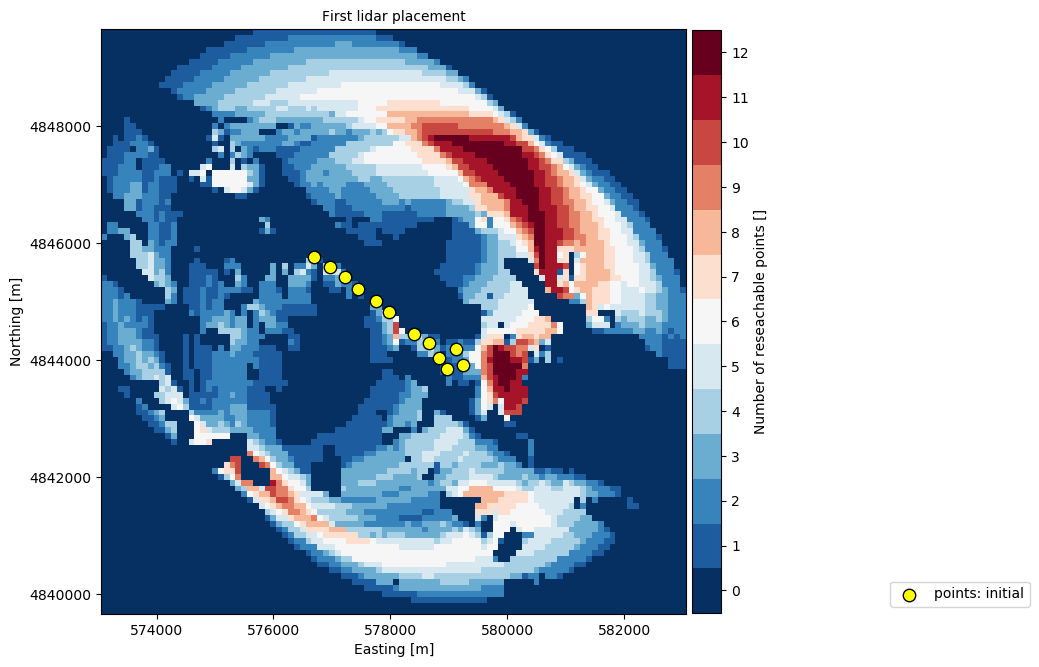

In [13]:
layout.plot_layer('first_lidar_placement', title = 'First lidar placement', save_plot = True)

The plot shows you areas where if you place lidar you will be able to reach a certain number of measurement points considering a number of constriants such as:
* Range
* Unobstracted line-of-sight
* Elevation angle
* Restriction zones 

Currently the CPT library don't provide an interactive way of placing lidar or optimization routine to do this for you. <br>Therefore, for time being you will have to get your hands a bit dirty.<br>

You have several posibilities of finding a good lidar position. <br>
You can export the above layer to KML by using following built-in method:
```
layout.lidar_position_suggestion(filename, **kwargs)
```
You can use another built-in method to get a list of potential positions:<br>
```
layout.lidar_position_suggestion(layer_id, teshold)
```
We will demonstrate both methods:<br>

In [14]:
layout.export_kml('first_lidar', layer_ids = ['first_lidar_placement'])
first_lidar_positions = layout.lidar_position_suggestion('first_lidar_placement', 12)

KML exported successful!


In the first method we are providing the KML file name followed with *layer_id* suppiled as a list.<br>
In the second method we provide *layer_id* string followed with a *treshold* provided as an integer. <br> 
The treshold represents a minimum number of measurement points the suggested lidar position should be able to provide considering all the constraints. <br>In our case, we want only locations which will allow us to reach all 12 measurement points. 
<br>
Now, you can either work in Google Earht or travers through the suggested positions:

Lidar 'koshava' added to the lidar dictionary, which now contains 1 lidar instance(s).
Updating lidar instance 'koshava' considering GIS layer 'first_lidar_placement'.


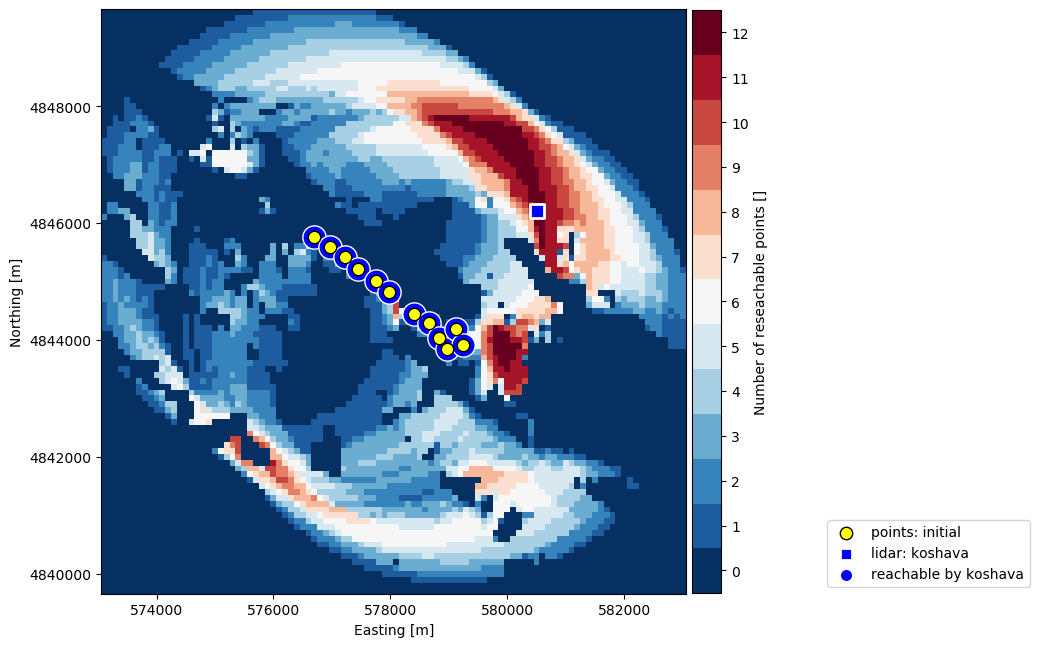

In [15]:
layout.add_lidar_instance('koshava', first_lidar_positions[30], layer_id = 'first_lidar_placement')
layout.plot_layer('first_lidar_placement', lidar_ids = ['koshava'])

What happened in the previous two lines of code? 
<br>First we call method
```
layout.add_lidar_instance(lidar_id, position, kwargs)
```
which adds lidar position to the lidar dictionary.<br>
In our case we provided this method with following parameters:
* lidar_id , set to *'koshava'*
* position, which was taken from previously derived suggested positions (i.e., first_lidar_positions)
* layer_id = *'first_lidar_placement'*

The last parameter points the method to extract information about the reachable points from a specific GIS layer, which in the case of the first lidar placement is *'first_lidar_placement'* and updates the lidar dictionary instance 'koshava' accordingly. <br>
You can access the lidar dictionary instance by calling:
```
layout.lidar_dictionary['koshava']
```
, and if you inspect specifically the following key:
```
layout.lidar_dictionary['koshava']['reachable_points']
```
you can see that the returned array contains 12 elements (same lenght as points) and all elements are equal to 1 since all measurement points are reachable. Otherwise, if a point is unreachable by the lidar in the dictionary this will be indicated with 0. <br>Inspect other elements of the lidar dictionary. We will use them at the later stage.

In [16]:
layout.lidar_dictionary['koshava']['reachable_points']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Since we have selected the first lidar position, let's add the second lidar. 
<br>Now we need to add one more contraint that is the minimum intersecting angle between beams.
By calling 
```
layout.MIN_INTERSECTING_ANGLE
```
you can see what is the preset value in degrees.<br>
For time being we will use the default value of 30 degrees and create so called <br>*'additional lidar placement layer'*
<br> To do this we will call method 
```
layout.generate_additional_lidar_placement_layer(lidar_id)
```
where *lidar_id* will be set to *'koshava'*, since that is the id of our first lidar.

Updating lidar instance 'koshava' considering GIS layer 'first_lidar_placement'.


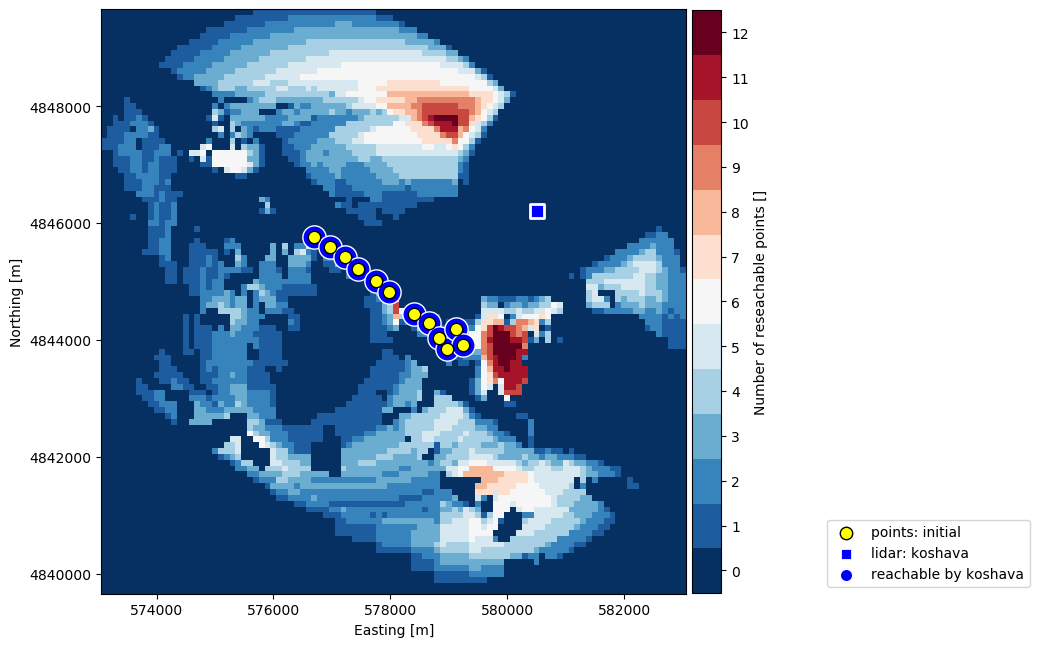

In [17]:
layout.generate_additional_lidar_placement_layer('koshava')
layout.plot_layer('additional_lidar_placement', lidar_ids = ['koshava'], save_plot = True)

In the above plot of the new GIS layer you can see that some areas which in the previous plot were indicated as a good areas for lidar installation are removed. The reason for this is that if the second lidar was placed at those areas the intersecting angle between the first and second lidar would be lower than 30 degrees.
<br>
Again we can export this newly made layer to KML file or use the internal method to suggest us the best positions for the second lidar:

In [18]:
layout.export_kml('second_lidar', layer_ids = ['additional_lidar_placement'])
second_lidar_positions = layout.lidar_position_suggestion('additional_lidar_placement', 12)

KML exported successful!


Lidar 'bura' added to the lidar dictionary, which now contains 2 lidar instance(s).
Updating lidar instance 'bura' considering GIS layer 'additional_lidar_placement'.


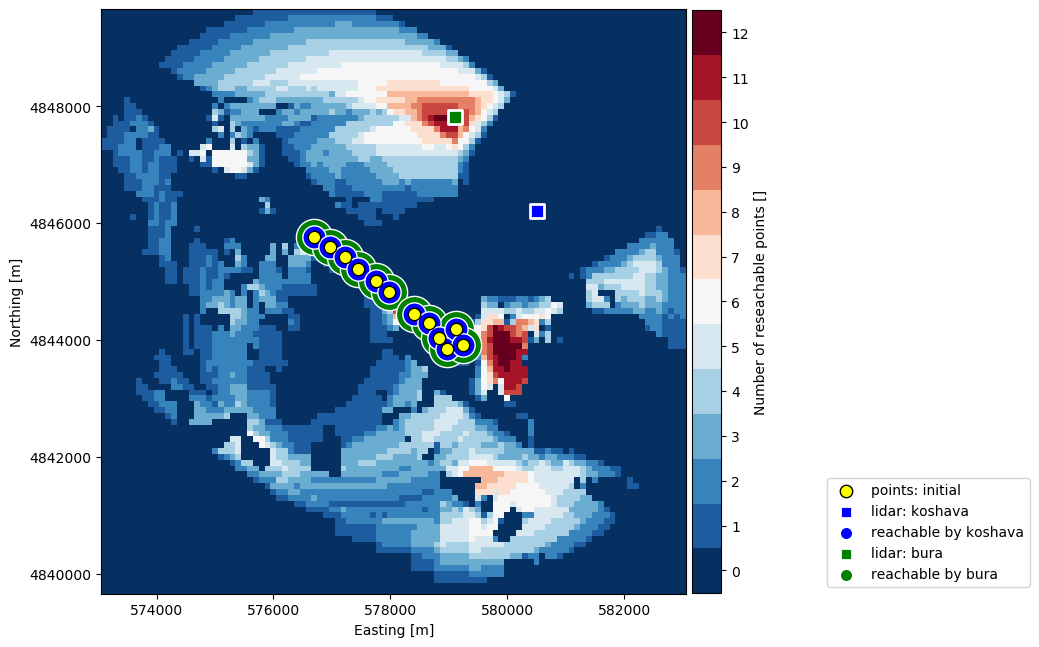

In [19]:
layout.add_lidar_instance('bura', second_lidar_positions[26],layer_id = 'additional_lidar_placement')  
layout.plot_layer('additional_lidar_placement', lidar_ids = ['koshava', 'bura'])

At this point we have positions of our dual-Doppler system and we are ready to optimize trajectory, plot campaign design and export lidars configurations. We will use the following built-in methods for this:<br>
```
layout.optimize_trajectory(lidar_ids, **kwargs)
layout.plot_design(layer_id, lidar_ids, **kwargs)
layout.export_measurement_scenario(layer_id)
```
Additionally we will export KML containing layers, lidar positions and trajectory:<br>
```
layout.export_kml(filename, **kwargs)
```

In [20]:
layout.optimize_trajectory(['koshava', 'bura'], sync = True, only_common_points = True)

Lidar instances:['koshava', 'bura'] will be updated with the optimized trajectory
Synchronizing trajectories for lidar instances:['koshava', 'bura']


In this method we set kwargs *sync* and *only_common_points* to True. The first kwarg will assure synchronized trajectories, while the second kwarg assure that trajectory will consider only measurement points reachable by both lidars. The optimize_trajectory method currently only generates step-stare trajectories. <br>
You can access lidar dictionary and the result of this method (i.e., access key 'motion_config').

In [21]:
layout.lidar_dictionary['koshava']['motion_config']

,Step-stare order,Azimuth [deg],Elevation [deg],Move time [ms]
0,12->1,263.16,3.94,1588.0
1,1->2,260.14,4.90,470.0
2,2->3,256.59,4.93,473.0
3,3->4,252.10,5.30,476.0
4,4->5,246.38,5.98,529.0
5,5->6,241.18,6.86,456.0
6,6->7,230.11,6.69,666.0
7,7->8,223.88,6.82,500.0
8,8->9,217.49,6.22,506.0
9,9->10,214.40,6.56,415.0


In [22]:
layout.lidar_dictionary['bura']['motion_config']

,Step-stare order,Azimuth [deg],Elevation [deg],Move time [ms]
0,12->1,229.51,5.32,1588.0
1,1->2,224.00,6.28,470.0
2,2->3,218.42,6.06,473.0
3,3->4,212.77,6.11,476.0
4,4->5,205.78,6.34,529.0
5,5->6,200.66,6.74,456.0
6,6->7,191.88,5.87,666.0
7,7->8,187.26,5.63,500.0
8,8->9,184.07,4.98,506.0
9,9->10,179.78,4.94,415.0


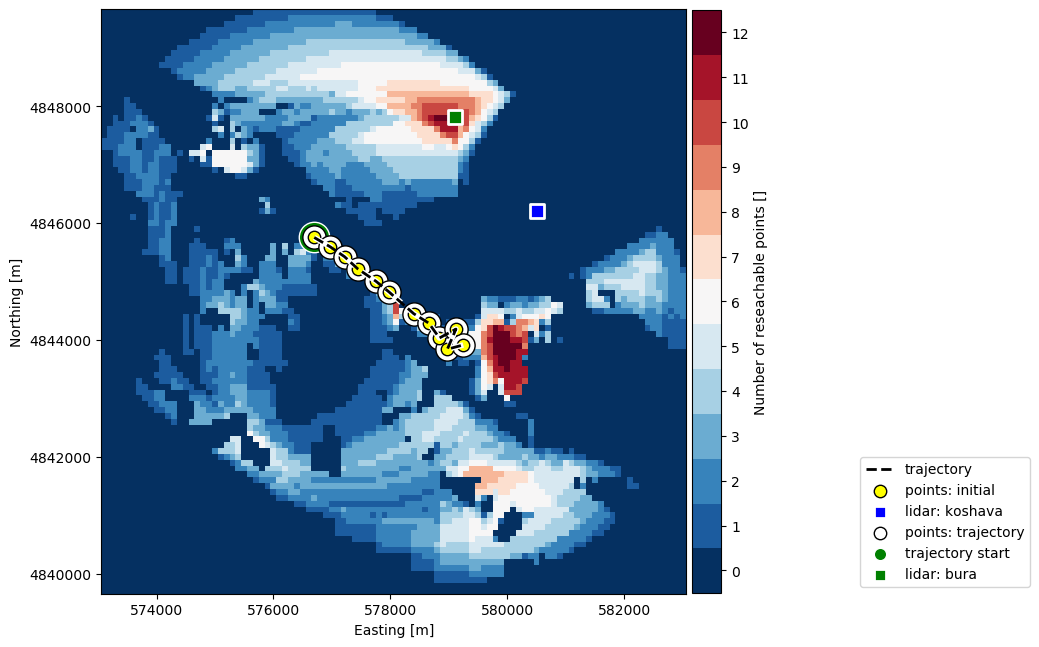

In [23]:
layout.plot_design('additional_lidar_placement', lidar_ids = ['koshava', 'bura'], save_plot = True)

In [24]:
layout.export_measurement_scenario(['koshava', 'bura'])
layout.export_kml('campaign_desing', 
                  layer_ids = ['first_lidar_placement','additional_lidar_placement'],
                  lidar_ids = ['koshava', 'bura'])

Measurement scenario export successful!
KML exported successful!


The last method will export following files:
1. Motion program to drive scanner heads (PMC file)
2. Range gate file to configure laser and FPGA (TXT file)
3. YAML and XML files containing human and machine readble compilation of information from (1) and (2)

Motion programs and range gate files are currently only applicable for [long-range WindScanners](https://www.mdpi.com/2072-4292/8/11/896).
<br>Now you are all equiped to make scanning lidar measurements!